# Handling Overfitting in Deep Neutral Network

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('sonar.csv' , header = None , skiprows = 1)
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
129,0.1371,0.1226,0.1385,0.1484,0.1776,0.1428,0.1773,0.2161,0.1630,0.2067,...,0.0118,0.0129,0.0344,0.0065,0.0067,0.0022,0.0079,0.0146,0.0051,Mine
26,0.0151,0.0320,0.0599,0.1050,0.1163,0.1734,0.1679,0.1119,0.0889,0.1205,...,0.0061,0.0015,0.0084,0.0128,0.0054,0.0011,0.0019,0.0023,0.0062,Rock
63,0.0067,0.0096,0.0024,0.0058,0.0197,0.0618,0.0432,0.0951,0.0836,0.1180,...,0.0048,0.0023,0.0020,0.0040,0.0019,0.0034,0.0034,0.0051,0.0031,Rock
155,0.0211,0.0128,0.0015,0.0450,0.0711,0.1563,0.1518,0.1206,0.1666,0.1345,...,0.0117,0.0023,0.0047,0.0049,0.0031,0.0024,0.0039,0.0051,0.0015,Mine
196,0.0050,0.0017,0.0270,0.0450,0.0958,0.0830,0.0879,0.1220,0.1977,0.2282,...,0.0165,0.0056,0.0010,0.0027,0.0062,0.0024,0.0063,0.0017,0.0028,Mine


In [3]:
x = df.drop(60 , axis =1 )
y = df[60]
y.head()

0    Rock
1    Rock
2    Rock
3    Rock
4    Rock
Name: 60, dtype: object

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [5]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.25 , random_state = 1)

# Using Deep Learning Model

## Building Our NN Model 

In [6]:
import tensorflow as tf

In [7]:
from tensorflow import keras

In [8]:
model = keras.Sequential([
    keras.layers.Dense(80 , input_dim = 60 ,  activation = 'relu'),
    keras.layers.Dense(30 , activation = 'relu'),
    keras.layers.Dense(15 , activation = 'relu'),
    keras.layers.Dense(1 ,  activation = 'sigmoid')
])
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

h = model.fit(x_train , y_train ,epochs = 100 , batch_size = 8 , validation_split = 0.3)

Epoch 1/100
14/14 [==============================] - 2s 33ms/step - loss: 0.6935 - accuracy: 0.5321 - val_loss: 0.6761 - val_accuracy: 0.5957
Epoch 2/100
14/14 [==============================] - 0s 7ms/step - loss: 0.6761 - accuracy: 0.5596 - val_loss: 0.6692 - val_accuracy: 0.5319
Epoch 3/100
14/14 [==============================] - 0s 6ms/step - loss: 0.6651 - accuracy: 0.5688 - val_loss: 0.6571 - val_accuracy: 0.5957
Epoch 4/100
14/14 [==============================] - 0s 7ms/step - loss: 0.6519 - accuracy: 0.6881 - val_loss: 0.6439 - val_accuracy: 0.5957
Epoch 5/100
14/14 [==============================] - 0s 7ms/step - loss: 0.6426 - accuracy: 0.6422 - val_loss: 0.6278 - val_accuracy: 0.7234
Epoch 6/100
14/14 [==============================] - 0s 6ms/step - loss: 0.6229 - accuracy: 0.7064 - val_loss: 0.6084 - val_accuracy: 0.7660
Epoch 7/100
14/14 [==============================] - 0s 7ms/step - loss: 0.6048 - accuracy: 0.7615 - val_loss: 0.5896 - val_accuracy: 0.7660
Epoch 8/100


Epoch 59/100
14/14 [==============================] - 0s 8ms/step - loss: 0.0318 - accuracy: 1.0000 - val_loss: 0.8651 - val_accuracy: 0.8298
Epoch 60/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0296 - accuracy: 1.0000 - val_loss: 0.8561 - val_accuracy: 0.8298
Epoch 61/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0301 - accuracy: 1.0000 - val_loss: 0.9226 - val_accuracy: 0.8085
Epoch 62/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0335 - accuracy: 1.0000 - val_loss: 0.9060 - val_accuracy: 0.8298
Epoch 63/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0225 - accuracy: 1.0000 - val_loss: 0.8987 - val_accuracy: 0.8511
Epoch 64/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0248 - accuracy: 1.0000 - val_loss: 0.9426 - val_accuracy: 0.8085
Epoch 65/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0218 - accuracy: 1.0000 - val_loss: 0.9239 - val_accuracy: 0.8298
Epoch 

In [9]:
loss , acc = model.evaluate(x_train , y_train)
print('Training Accuracy : ',acc*100)

5/5 [==============================] - 0s 3ms/step - loss: 0.3720 - accuracy: 0.9487
Training Accuracy :  94.87179517745972


In [10]:
loss, acc = model.evaluate(x_test, y_test)
print('Test Accuracy: ', acc*100)

2/2 [==============================] - 0s 4ms/step - loss: 1.2746 - accuracy: 0.7692
Test Accuracy:  76.92307829856873


Our model is overfitting

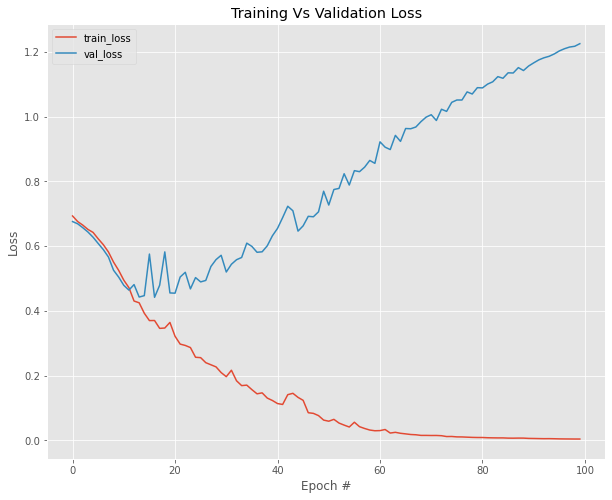

In [11]:
import matplotlib.pyplot as plt

epochs = np.arange(0, len(h.history['loss']))
plt.figure(figsize = (10,8))
plt.style.use('ggplot')

plt.style.use('ggplot')
plt.plot(epochs , h.history['loss'] , label = 'train_loss')
plt.plot(epochs, h.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

# Fixing Overfitting

There are many techniques that we can employ to fix the problem of verfitting. Below are the most common and recommended ones:

Simplify the complexity of the model

L2 Regularization

Drop Out

Early Stopping

Data Augmentation

## Adding  L2 Regularization from Keras

In [12]:
model = keras.Sequential([
    keras.layers.Dense(80 , input_dim = 60 ,  activation = 'relu' , kernel_regularizer = tf.keras.regularizers.l2(0.1)),
    keras.layers.Dense(30 , activation = 'relu'),
    keras.layers.Dense(15 , activation = 'relu'),
    keras.layers.Dense(1 ,  activation = 'sigmoid')
])
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

h = model.fit(x_train , y_train ,epochs = 100 , batch_size = 8 , validation_split = 0.3)

Epoch 1/100
14/14 [==============================] - 2s 23ms/step - loss: 6.9998 - accuracy: 0.5413 - val_loss: 6.3040 - val_accuracy: 0.5319
Epoch 2/100
14/14 [==============================] - 0s 6ms/step - loss: 5.7963 - accuracy: 0.5413 - val_loss: 5.2146 - val_accuracy: 0.5319
Epoch 3/100
14/14 [==============================] - 0s 6ms/step - loss: 4.7919 - accuracy: 0.5413 - val_loss: 4.3110 - val_accuracy: 0.5319
Epoch 4/100
14/14 [==============================] - 0s 6ms/step - loss: 3.9659 - accuracy: 0.5505 - val_loss: 3.5719 - val_accuracy: 0.5532
Epoch 5/100
14/14 [==============================] - 0s 6ms/step - loss: 3.2914 - accuracy: 0.5413 - val_loss: 2.9676 - val_accuracy: 0.5319
Epoch 6/100
14/14 [==============================] - 0s 7ms/step - loss: 2.7423 - accuracy: 0.5688 - val_loss: 2.4837 - val_accuracy: 0.5745
Epoch 7/100
14/14 [==============================] - 0s 7ms/step - loss: 2.3014 - accuracy: 0.5963 - val_loss: 2.0927 - val_accuracy: 0.6809
Epoch 8/100


Epoch 59/100
14/14 [==============================] - 0s 5ms/step - loss: 0.3009 - accuracy: 0.9541 - val_loss: 0.5559 - val_accuracy: 0.8085
Epoch 60/100
14/14 [==============================] - 0s 5ms/step - loss: 0.2945 - accuracy: 0.9725 - val_loss: 0.5757 - val_accuracy: 0.8298
Epoch 61/100
14/14 [==============================] - 0s 5ms/step - loss: 0.2873 - accuracy: 0.9633 - val_loss: 0.5926 - val_accuracy: 0.8085
Epoch 62/100
14/14 [==============================] - 0s 5ms/step - loss: 0.3130 - accuracy: 0.9174 - val_loss: 0.6242 - val_accuracy: 0.8298
Epoch 63/100
14/14 [==============================] - 0s 5ms/step - loss: 0.4382 - accuracy: 0.7982 - val_loss: 0.5696 - val_accuracy: 0.8298
Epoch 64/100
14/14 [==============================] - 0s 5ms/step - loss: 0.3686 - accuracy: 0.8716 - val_loss: 0.5551 - val_accuracy: 0.8085
Epoch 65/100
14/14 [==============================] - 0s 6ms/step - loss: 0.4091 - accuracy: 0.8257 - val_loss: 0.5529 - val_accuracy: 0.8298
Epoch 

In [13]:
loss, acc = model.evaluate(x_test, y_test)
print('Test Accuracy: ', acc*100)

2/2 [==============================] - 0s 8ms/step - loss: 0.8431 - accuracy: 0.7500
Test Accuracy:  75.0


In [14]:
loss, acc = model.evaluate(x_train, y_train)
print('Test Accuracy: ', acc*100)

5/5 [==============================] - 0s 5ms/step - loss: 0.4145 - accuracy: 0.8782
Test Accuracy:  87.82051205635071


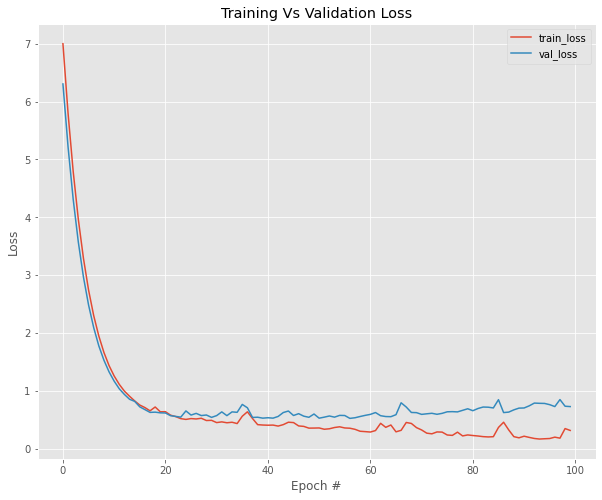

In [15]:
import matplotlib.pyplot as plt

epochs = np.arange(0, len(h.history['loss']))
plt.figure(figsize = (10,8))
plt.style.use('ggplot')

plt.style.use('ggplot')
plt.plot(epochs , h.history['loss'] , label = 'train_loss')
plt.plot(epochs, h.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

# Adding dropout and regularization

In [16]:
#kernel_regularizer=tf.keras.regularizers.l2(0.1)



model = keras.Sequential([
    keras.layers.Dense(80, input_dim=60, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    
    keras.layers.Dense(30, activation='relu'),
    
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

H = model.fit(x_train, y_train, epochs=100, batch_size=8, validation_split=0.3)

Epoch 1/100
14/14 [==============================] - 2s 26ms/step - loss: 6.8761 - accuracy: 0.5413 - val_loss: 6.1990 - val_accuracy: 0.5745
Epoch 2/100
14/14 [==============================] - 0s 7ms/step - loss: 5.7065 - accuracy: 0.5596 - val_loss: 5.1421 - val_accuracy: 0.5745
Epoch 3/100
14/14 [==============================] - 0s 6ms/step - loss: 4.7308 - accuracy: 0.5780 - val_loss: 4.2646 - val_accuracy: 0.6596
Epoch 4/100
14/14 [==============================] - 0s 7ms/step - loss: 3.9249 - accuracy: 0.6239 - val_loss: 3.5461 - val_accuracy: 0.6596
Epoch 5/100
14/14 [==============================] - 0s 7ms/step - loss: 3.2723 - accuracy: 0.6330 - val_loss: 2.9611 - val_accuracy: 0.6809
Epoch 6/100
14/14 [==============================] - 0s 7ms/step - loss: 2.7425 - accuracy: 0.6239 - val_loss: 2.4840 - val_accuracy: 0.7660
Epoch 7/100
14/14 [==============================] - 0s 7ms/step - loss: 2.3047 - accuracy: 0.6606 - val_loss: 2.0966 - val_accuracy: 0.7234
Epoch 8/100


Epoch 59/100
14/14 [==============================] - 0s 6ms/step - loss: 0.3835 - accuracy: 0.8807 - val_loss: 0.5163 - val_accuracy: 0.8723
Epoch 60/100
14/14 [==============================] - 0s 6ms/step - loss: 0.3091 - accuracy: 0.9358 - val_loss: 0.5411 - val_accuracy: 0.8511
Epoch 61/100
14/14 [==============================] - 0s 6ms/step - loss: 0.3523 - accuracy: 0.8991 - val_loss: 0.5329 - val_accuracy: 0.8511
Epoch 62/100
14/14 [==============================] - 0s 6ms/step - loss: 0.3191 - accuracy: 0.9541 - val_loss: 0.5160 - val_accuracy: 0.8723
Epoch 63/100
14/14 [==============================] - 0s 6ms/step - loss: 0.3213 - accuracy: 0.9083 - val_loss: 0.5526 - val_accuracy: 0.8511
Epoch 64/100
14/14 [==============================] - 0s 7ms/step - loss: 0.3080 - accuracy: 0.9266 - val_loss: 0.5466 - val_accuracy: 0.8511
Epoch 65/100
14/14 [==============================] - 0s 7ms/step - loss: 0.3723 - accuracy: 0.8807 - val_loss: 0.5125 - val_accuracy: 0.8511
Epoch 

In [17]:
loss, acc = model.evaluate(x_test, y_test)
print('Test Accuracy: ', acc*100)

2/2 [==============================] - 0s 6ms/step - loss: 0.6936 - accuracy: 0.7692
Test Accuracy:  76.92307829856873


In [18]:
loss, acc = model.evaluate(x_train, y_train)
print('Test Accuracy: ', acc*100)

5/5 [==============================] - 0s 5ms/step - loss: 0.3232 - accuracy: 0.9423
Test Accuracy:  94.2307710647583


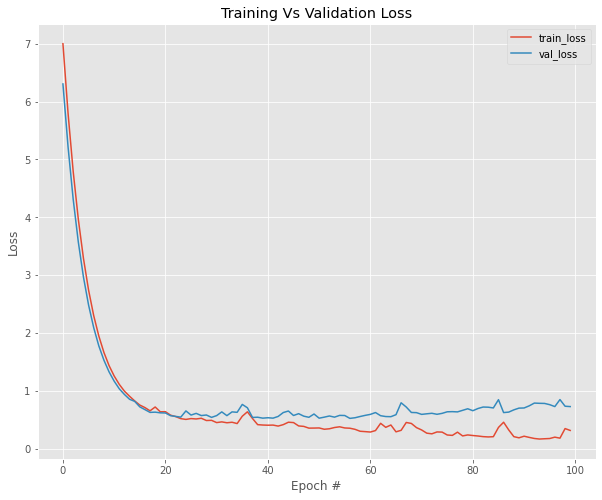

In [19]:
import matplotlib.pyplot as plt

epochs = np.arange(0, len(h.history['loss']))
plt.figure(figsize = (10,8))
plt.style.use('ggplot')

plt.style.use('ggplot')
plt.plot(epochs , h.history['loss'] , label = 'train_loss')
plt.plot(epochs, h.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

# Early Stopping

Early stopping is a technique that can avoid over-training and hence overfitting of the model. An over-trained model has a tendency to memorize all the training data points. With early stopping, a large arbitrary number of training epochs is specified. The model is stopped from training further when the model performance stops improving on the validation dataset.

In [20]:
model = keras.Sequential([
    keras.layers.Dense(80, input_dim=60, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    
    keras.layers.Dense(30, activation='relu'),
    
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

H = model.fit(x_train, y_train, epochs=100, batch_size=8, validation_split=0.3,callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',verbose=1, patience=5)
)

Epoch 1/100
14/14 [==============================] - 3s 30ms/step - loss: 7.0139 - accuracy: 0.3761 - val_loss: 6.3186 - val_accuracy: 0.4681
Epoch 2/100
14/14 [==============================] - 0s 9ms/step - loss: 5.8151 - accuracy: 0.5321 - val_loss: 5.2289 - val_accuracy: 0.5745
Epoch 3/100
14/14 [==============================] - 0s 7ms/step - loss: 4.8091 - accuracy: 0.5229 - val_loss: 4.3245 - val_accuracy: 0.5319
Epoch 4/100
14/14 [==============================] - 0s 11ms/step - loss: 3.9814 - accuracy: 0.5963 - val_loss: 3.5863 - val_accuracy: 0.5532
Epoch 5/100
14/14 [==============================] - 0s 7ms/step - loss: 3.3040 - accuracy: 0.6147 - val_loss: 2.9814 - val_accuracy: 0.5532
Epoch 6/100
14/14 [==============================] - 0s 7ms/step - loss: 2.7595 - accuracy: 0.6422 - val_loss: 2.4922 - val_accuracy: 0.6809
Epoch 7/100
14/14 [==============================] - 0s 7ms/step - loss: 2.3169 - accuracy: 0.6239 - val_loss: 2.0978 - val_accuracy: 0.7234
Epoch 8/100

In [21]:
loss, acc=model.evaluate(x_test, y_test)
print('Test Accuracy: ', acc*100)

2/2 [==============================] - 0s 9ms/step - loss: 0.5950 - accuracy: 0.7692
Test Accuracy:  76.92307829856873


In [22]:
loss, acc = model.evaluate(x_train, y_train)
print('Training Accuracy: ', acc*100)

5/5 [==============================] - 0s 5ms/step - loss: 0.5572 - accuracy: 0.8333
Training Accuracy:  83.33333134651184


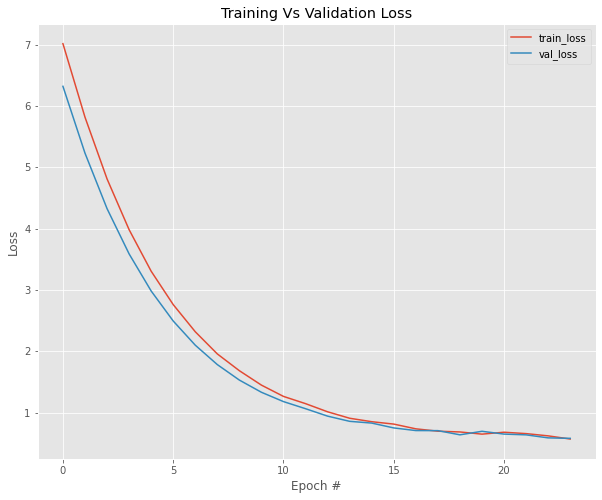

In [23]:

import matplotlib.pyplot as plt


epochs = np.arange(0, len(H.history["loss"]))
plt.figure(figsize=(10,8))
plt.style.use("ggplot")
# (fig, axs) = plt.subplots(2, 1)
# plot the *unshifted* training and validation loss
plt.style.use("ggplot")
plt.plot(epochs, H.history["loss"], label="train_loss")
plt.plot(epochs, H.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

# ModelCheckpoint Callback

In [24]:

from tensorflow.keras.callbacks import ModelCheckpoint

model = keras.Sequential([
keras.layers.Dense(80, input_dim=60, activation='relu'),
keras.layers.Dense(30, activation='relu'),
keras.layers.Dense(15, activation='relu'),
keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

checkpoint = ModelCheckpoint('SOMETHINGELSE', monitor="val_loss", mode="min",
	save_best_only=True, verbose=1),
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',verbose=1, patience=5)
callbacks = [checkpoint,earlystopping]


H = model.fit(x_train, y_train, epochs=100, batch_size=8, validation_split=0.3,callbacks=callbacks) #To discover the training epoch on which training was stopped, the “verbose” argument can be set to 1. Once stopped, the callback will print the epoch number., Add "patience" to wait for sometime before stopping after the best accuracy or val_loss has been found.


Epoch 1/100
 1/14 [=>............................] - ETA: 26s - loss: 0.6650 - accuracy: 0.7500
Epoch 1: val_loss improved from inf to 0.69181, saving model to SOMETHINGELSE


INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


14/14 [==============================] - 4s 139ms/step - loss: 0.7016 - accuracy: 0.4954 - val_loss: 0.6918 - val_accuracy: 0.4894
Epoch 2/100
 1/14 [=>............................] - ETA: 0s - loss: 0.6750 - accuracy: 0.7500
Epoch 2: val_loss improved from 0.69181 to 0.67934, saving model to SOMETHINGELSE


INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


14/14 [==============================] - 1s 114ms/step - loss: 0.6772 - accuracy: 0.5780 - val_loss: 0.6793 - val_accuracy: 0.5532
Epoch 3/100
10/14 [====================>.........] - ETA: 0s - loss: 0.6639 - accuracy: 0.6125
Epoch 3: val_loss improved from 0.67934 to 0.66550, saving model to SOMETHINGELSE


INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


14/14 [==============================] - 1s 110ms/step - loss: 0.6679 - accuracy: 0.5780 - val_loss: 0.6655 - val_accuracy: 0.5745
Epoch 4/100
 7/14 [==============>...............] - ETA: 0s - loss: 0.6438 - accuracy: 0.6429
Epoch 4: val_loss improved from 0.66550 to 0.64725, saving model to SOMETHINGELSE


INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


14/14 [==============================] - 2s 122ms/step - loss: 0.6560 - accuracy: 0.6147 - val_loss: 0.6473 - val_accuracy: 0.7872
Epoch 5/100
14/14 [==============================] - ETA: 0s - loss: 0.6348 - accuracy: 0.7064
Epoch 5: val_loss improved from 0.64725 to 0.61788, saving model to SOMETHINGELSE


INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


14/14 [==============================] - 2s 128ms/step - loss: 0.6348 - accuracy: 0.7064 - val_loss: 0.6179 - val_accuracy: 0.8511
Epoch 6/100
 1/14 [=>............................] - ETA: 0s - loss: 0.7049 - accuracy: 0.6250
Epoch 6: val_loss improved from 0.61788 to 0.59291, saving model to SOMETHINGELSE


INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


14/14 [==============================] - 2s 153ms/step - loss: 0.6149 - accuracy: 0.7248 - val_loss: 0.5929 - val_accuracy: 0.7872
Epoch 7/100
 1/14 [=>............................] - ETA: 0s - loss: 0.5365 - accuracy: 0.8750
Epoch 7: val_loss improved from 0.59291 to 0.56168, saving model to SOMETHINGELSE


INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


14/14 [==============================] - 2s 129ms/step - loss: 0.5869 - accuracy: 0.7248 - val_loss: 0.5617 - val_accuracy: 0.8936
Epoch 8/100
 1/14 [=>............................] - ETA: 0s - loss: 0.5446 - accuracy: 1.0000
Epoch 8: val_loss improved from 0.56168 to 0.53356, saving model to SOMETHINGELSE


INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


14/14 [==============================] - 2s 119ms/step - loss: 0.5676 - accuracy: 0.7982 - val_loss: 0.5336 - val_accuracy: 0.8298
Epoch 9/100
 1/14 [=>............................] - ETA: 0s - loss: 0.5085 - accuracy: 0.8750
Epoch 9: val_loss improved from 0.53356 to 0.52081, saving model to SOMETHINGELSE


INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


14/14 [==============================] - 2s 121ms/step - loss: 0.5240 - accuracy: 0.7982 - val_loss: 0.5208 - val_accuracy: 0.7234
Epoch 10/100
 1/14 [=>............................] - ETA: 0s - loss: 0.5066 - accuracy: 0.7500
Epoch 10: val_loss did not improve from 0.52081
14/14 [==============================] - 0s 8ms/step - loss: 0.5273 - accuracy: 0.7248 - val_loss: 0.5369 - val_accuracy: 0.7234
Epoch 11/100
13/14 [==========================>...] - ETA: 0s - loss: 0.4899 - accuracy: 0.7981
Epoch 11: val_loss improved from 0.52081 to 0.44201, saving model to SOMETHINGELSE


INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


14/14 [==============================] - 2s 133ms/step - loss: 0.4847 - accuracy: 0.8073 - val_loss: 0.4420 - val_accuracy: 0.8511
Epoch 12/100
 1/14 [=>............................] - ETA: 0s - loss: 0.5070 - accuracy: 0.7500
Epoch 12: val_loss improved from 0.44201 to 0.43740, saving model to SOMETHINGELSE


INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


14/14 [==============================] - 2s 136ms/step - loss: 0.4472 - accuracy: 0.8440 - val_loss: 0.4374 - val_accuracy: 0.8511
Epoch 13/100
 1/14 [=>............................] - ETA: 0s - loss: 0.4115 - accuracy: 0.8750
Epoch 13: val_loss improved from 0.43740 to 0.41166, saving model to SOMETHINGELSE


INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


14/14 [==============================] - 2s 180ms/step - loss: 0.4313 - accuracy: 0.8165 - val_loss: 0.4117 - val_accuracy: 0.8723
Epoch 14/100
10/14 [====================>.........] - ETA: 0s - loss: 0.4364 - accuracy: 0.8000
Epoch 14: val_loss improved from 0.41166 to 0.37920, saving model to SOMETHINGELSE


INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


14/14 [==============================] - 2s 132ms/step - loss: 0.4162 - accuracy: 0.8165 - val_loss: 0.3792 - val_accuracy: 0.8298
Epoch 15/100
 1/14 [=>............................] - ETA: 0s - loss: 0.3419 - accuracy: 0.8750
Epoch 15: val_loss did not improve from 0.37920
14/14 [==============================] - 0s 6ms/step - loss: 0.3676 - accuracy: 0.8991 - val_loss: 0.3884 - val_accuracy: 0.8511
Epoch 16/100
 1/14 [=>............................] - ETA: 0s - loss: 0.3910 - accuracy: 0.8750
Epoch 16: val_loss did not improve from 0.37920
14/14 [==============================] - 0s 6ms/step - loss: 0.3593 - accuracy: 0.8899 - val_loss: 0.3824 - val_accuracy: 0.8511
Epoch 17/100
 1/14 [=>............................] - ETA: 0s - loss: 0.2765 - accuracy: 1.0000
Epoch 17: val_loss did not improve from 0.37920
14/14 [==============================] - 0s 6ms/step - loss: 0.3225 - accuracy: 0.9174 - val_loss: 0.3964 - val_accuracy: 0.8511
Epoch 18/100
 1/14 [=>............................

In [25]:
loss, acc=model.evaluate(x_test, y_test)
print('Test Accuracy: ', acc*100)

2/2 [==============================] - 0s 7ms/step - loss: 0.4257 - accuracy: 0.7692
Test Accuracy:  76.92307829856873


In [26]:
loss, acc = model.evaluate(x_train, y_train)
print('Training Accuracy: ', acc*100)

5/5 [==============================] - 0s 4ms/step - loss: 0.3060 - accuracy: 0.9103
Training Accuracy:  91.02563858032227


# Load best weight

In [27]:
model = keras.Sequential([
keras.layers.Dense(80, input_dim=60, activation='relu'),
keras.layers.Dense(30, activation='relu'),
keras.layers.Dense(15, activation='relu'),
keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.load_weights("SOMETHINGELSE")
print(model.evaluate(x_test, y_test))

2/2 [==============================] - 0s 8ms/step - loss: 0.4400 - accuracy: 0.7500
[0.4400038719177246, 0.75]
